# 1. GeoPandas
- 지리정보 데이터 처리의 연산과 시각화를 돕는 패키지
- pandas에서 series와 DataFrame이 있듯이 GeoPandas에서도 GeoSeries와 GeoDataFrame이 있다.

In [7]:
import geopandas as gpd
import matplotlib as mplot
import matplotlib.pyplot as plt
gpd.__version__

'0.14.0'

In [23]:
#1
countries = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
cities = gpd.read_file(gpd.datasets.get_path('naturalearth_cities'))

countries.tail(3)

C:\Users\SKW\AppData\Local\Temp\ipykernel_20504\3995128592.py:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  countries = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
C:\Users\SKW\AppData\Local\Temp\ipykernel_20504\3995128592.py:3: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_cities' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  cities = gpd.read_file(gpd.datasets.get_path('naturalearth_cities'))


,pop_est,continent,name,iso_a3,gdp_md_est,geometry
174,1794248.0,Europe,Kosovo,-99,7926,"POLYGON ((20.59025 41.85541, 20.52295 42.21787..."
175,1394973.0,North America,Trinidad and Tobago,TTO,24269,"POLYGON ((-61.68000 10.76000, -61.10500 10.890..."
176,11062113.0,Africa,S. Sudan,SSD,11998,"POLYGON ((30.83385 3.50917, 29.95350 4.17370, ..."


In [3]:
#2
cities.tail()

,name,geometry
238,Rio de Janeiro,POINT (-43.21212 -22.90731)
239,São Paulo,POINT (-46.62697 -23.55673)
240,Sydney,POINT (151.21255 -33.87137)
241,Singapore,POINT (103.85387 1.29498)
242,Hong Kong,POINT (114.18306 22.30693)


> 지리정보의 시각화
- plot() 명령을 사용하면 Geopandas 내부의 Geometry 데이터를 쉽게 시각화 할 수 있다.
- Geometry 데이터는 다각형, 선, 점 포함하는데 이러한 데이터를 Shapely 패키지를 사용하여 처리.
- 각 Polygon, LineStirng, Point로 정의
---
- 변수지정 = 데이터.plot (clounm = "넣고 싶은 열", 상세 디자인) ** 표현하려는 정보가 범주형데이터면 categorical = True
- 변수.set_title("지도 제목")
- 변수.set_axis_off() -> 축 표시안함

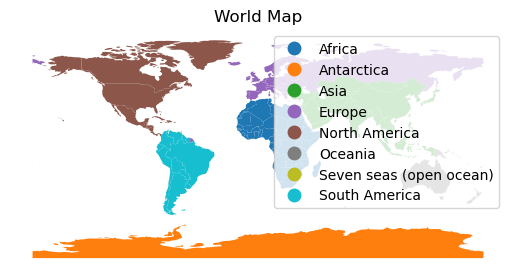

In [8]:
#3
#import matplotlib.pyplot as plt
ax = countries.plot(column="continent", legend=True, categorical=True)
ax.set_title("World Map")
ax.set_axis_off()
plt.show()

> 표현하고 싶은 컬럼 값이 실수일 때 : 데이터를 구분하는 방법과 갯수를 정의할 수 있음
- plot(scheme = '', k = "")
- ' ' 구분하는 방법 : Equal_interval(동일 간격으로), Quantiles(4분위수 0 25 50 75), Fisher_Jenks 등
- " " 구분하는 갯수 : 디폴트는 5

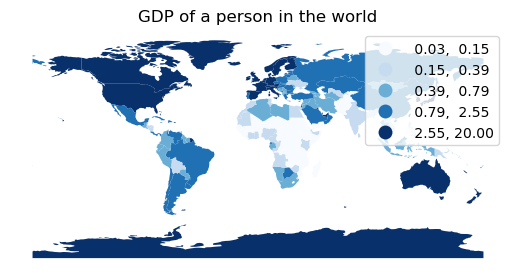

In [11]:
#4
#pip install mapclassify
countries['gdp_per_cap'] = countries['gdp_md_est'] / countries['pop_est'] * 100

ax = countries.plot(column='gdp_per_cap', legend=True, scheme='quantiles', cmap="Blues", k=5)
#데이터의 gdp_per_cap 열이 사용되었고, 사분위수 구분 방식을 쓰고, 5개 범위로 구분되었다.
ax.set_axis_off()
ax.set_title("GDP of a person in the world")
plt.show()

# 2. Geometry 데이터 종류
###### * GeoPandas에서는 Shapely라는 패키지를 통해 Geometry 데이터를 처리

### Geometry 데이터의 속성
- area : 넓이 <br>
boundrt : 테두리 <br>
centroid : 중앙지점 <br>
distance : 두 점 사이의 거리<br><br>
*넓이 및 거리는 단위를 사용하는 것이 아니기 때문에 같은 객체안에서만 비교 가능

> Polygons
- 여러 개의 점을 이은 다각형

In [31]:
#5
countries.geom_type[:3]

0    MultiPolygon
1         Polygon
2         Polygon
dtype: object

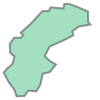

In [46]:
countries.geometry[110]

> Points
- 하나의 좌표

In [28]:
#6
cities.geom_type[:3]

0    Point
1    Point
2    Point
dtype: object

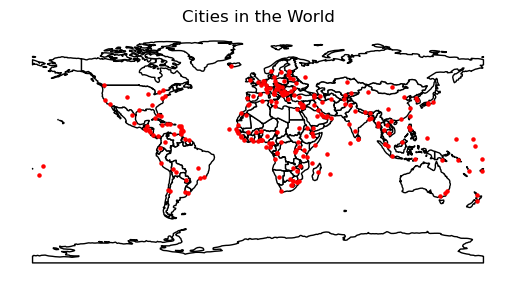

In [54]:
base = countries.plot(color='white', edgecolor="k")
ax = cities.plot(ax=base, marker='o', color='red', markersize=5)
ax.set_axis_off()
ax.set_title("Cities in the World")
plt.show()

> LineString
- 점들을 이은 것
- 도시 사이의 길, 강의 흐름, 국경과 같은 경계면

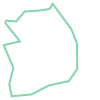

In [66]:
#7
korea_border = countries[countries.name == "South Korea"].geometry
korea_border.boundary.squeeze()
#squeeze()함수는 GeoPandas 객체에서 Geometry 데이터 만을 추출해주는 기능을 한다.

# 3. GeoPandas의 지리 데이터 간의 관계 연산
- 관계란 두 데이터가 교차하는지, 하나가 다른 하나의 내부에 있는지 등을 말한다.

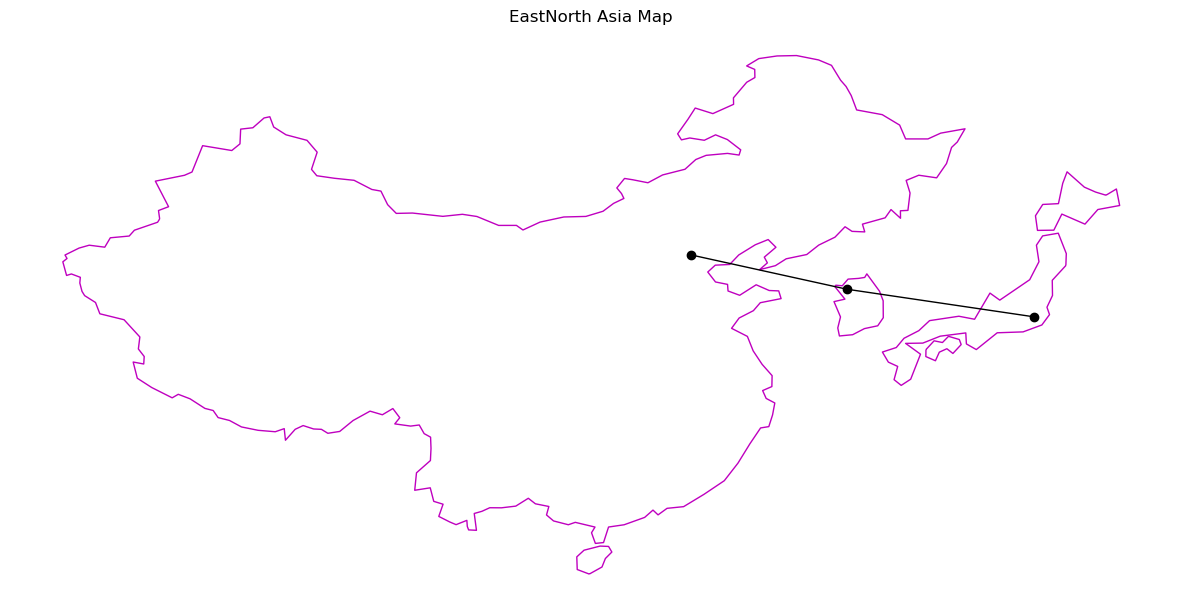

In [71]:
#8
from shapely.geometry import Point, Polygon, LineString

northern_asia = countries.loc[countries['name'].isin(['South Korea', 'China', 'Japan'])]
base = northern_asia.plot(figsize=(15, 15), color="w", edgecolor="m")
#countries에서 name열이 'South Korea', 'China', 'Japan'인 행들만 추출
#지도크기는 15*15, 배경색은 하얀색 및 경계선은 자홍색으로 선택한 국가들을 그림

seoul = cities.loc[cities.name == "Seoul", "geometry"].squeeze()
beijing = cities.loc[cities.name == "Beijing", "geometry"].squeeze()
tokyo = cities.loc[cities.name == "Tokyo", "geometry"].squeeze()
#cities에서 name이 "Seoul", "Beijing", "Tokyo", "Geometry" 데이터 각각 추출

line = LineString([beijing, seoul, tokyo]) # 세 개의 도시의 점을 이은 LineString

ax = gpd.GeoSeries([seoul, beijing, tokyo, line]).plot(ax=base, color="k", edgecolor='k', lw=1)
#GeoSeries 객체 생성 후, plot 매소드를 통해 객체들을 지도에 표시.
#plot 매소드는 중요한 인자들을 받음
# 1. ax = base : 기존에 생성된 base지도를 기반으로 그림을 그림
# 2. color = k : 도시와 LineString은 검정
# 3. edgecolor = k : 객체들의 외곽선 색은 검정(선)
# 4. lw = 1 : 선의 두께는 1
ax.set_title("EastNorth Asia Map") #지도 제목
ax.set_axis_off() #지도 축 숨김

plt.show()

> 다음은 기본적인 관계 연산 함수들이다. 관계연산의 출력값은 부울리언 값이다.

기본 관계 연산

- within : 지리적으로 포함되는지 여부

- contains : 지리적으로 포함하고 있는지 여부

- intersects : 지리적으로 교차하는지 여부, 두 지리가 경계선만 닿아있어도, True를 반환

- crosses : 지리적으로 교차하는지 여부,<br> (intersects와의 차이점은 crosses는 내부를 지나가야만 True를 반환한다는 것이다.)

In [79]:
#9
korea = countries.loc[countries['name'] == 'South Korea', 'geometry'].squeeze()
china = countries.loc[countries['name'] == 'China', 'geometry'].squeeze()
japan = countries.loc[countries['name'] == 'Japan', 'geometry'].squeeze()

print(seoul.within(korea)) #서울이 한국안에 있나용
print(korea.contains(seoul)) #한국은 서울을 포함하나용
print(china.intersects(korea)) #대한민국과 중국의 국경이 맞닿아 있는지 여부
print(line.crosses(korea)) #LingString이 한국을 지나가나용

True
True
False
True


In [80]:
#10
countries[countries.crosses(line)] #LingStriing이 지나가는 국가들 추출

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,gdp_per_cap
95,2.566616e+07,Asia,North Korea,PRK,40000,"MULTIPOLYGON (((130.78000 42.22001, 130.78000 ...",0.155847
96,5.170910e+07,Asia,South Korea,KOR,1646739,"POLYGON ((126.17476 37.74969, 126.23734 37.840...",3.184621
139,1.397715e+09,Asia,China,CHN,14342903,"MULTIPOLYGON (((109.47521 18.19770, 108.65521 ...",1.026168
155,1.262649e+08,Asia,Japan,JPN,5081769,"MULTIPOLYGON (((141.88460 39.18086, 140.95949 ...",4.024688


> 속성을 이용한 연산

In [82]:
seoul.distance(beijing)

10.857295783020785

In [83]:
countries[countries.geometry.distance(seoul) <= seoul.distance(beijing)]
#'서울과 베이징의 거리' 보다 서울에서 가까운 데이터 추출

C:\Users\SKW\AppData\Local\Temp\ipykernel_17348\2343980730.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  countries[countries.geometry.distance(seoul) <= seoul.distance(beijing)]


,pop_est,continent,name,iso_a3,gdp_md_est,geometry,gdp_per_cap
18,1.443735e+08,Europe,Russia,RUS,1699876,"MULTIPOLYGON (((180.00000 71.51571, 180.00000 ...",1.177415
95,2.566616e+07,Asia,North Korea,PRK,40000,"MULTIPOLYGON (((130.78000 42.22001, 130.78000 ...",0.155847
96,5.170910e+07,Asia,South Korea,KOR,1646739,"POLYGON ((126.17476 37.74969, 126.23734 37.840...",3.184621
139,1.397715e+09,Asia,China,CHN,14342903,"MULTIPOLYGON (((109.47521 18.19770, 108.65521 ...",1.026168
155,1.262649e+08,Asia,Japan,JPN,5081769,"MULTIPOLYGON (((141.88460 39.18086, 140.95949 ...",4.024688


In [90]:
#영토 면적 비율
print(china.area / korea.area)
print(korea.area / china.area)
print(((china.area / korea.area) * (korea.area / china.area)))

95.89679828612043
0.010427876820416584
1.0


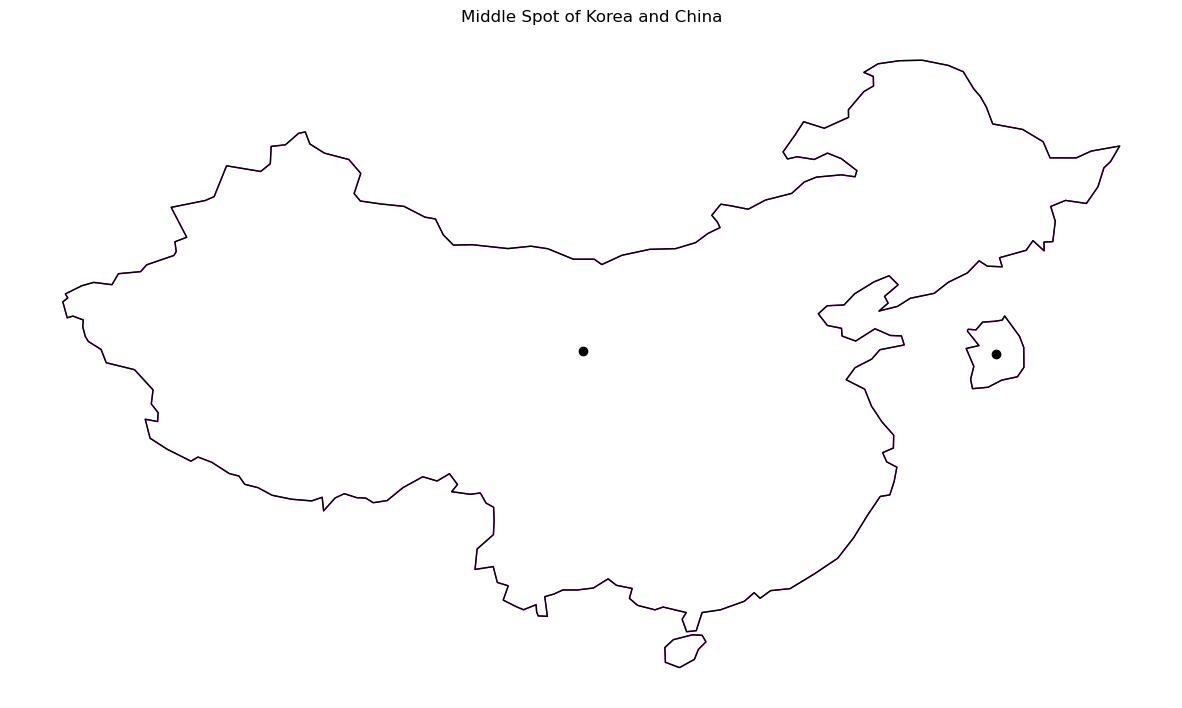

In [88]:
base = northern_asia[northern_asia.name != "Japan"].plot(figsize=(15, 15), color="w", edgecolor="m")
#기존 northern_asia에서 'Japan' 제외한 지도를 그림
ax = gpd.GeoSeries([china.boundary, korea.boundary, china.centroid, korea.centroid]).plot(ax=base, color="k", edgecolor='k', lw=1)
#중국의 경계와 중심점, 한국의 경계와 중심점을 base를 기반으로 검정색으로 선두께는 1로 
ax.set_title("Middle Spot of Korea and China")
ax.set_axis_off()
plt.show()

# 4. 지리 정보 조작

아래의 링크를 통해 서울특별시의 기초구역도 데이터 다운로드
- http://data.nsdi.go.kr/dataset/20180918ds00074/resource/03bf4f9c-d6fa-40b2-aafe-996adaed8673?inner_span=True

In [6]:
seoul_file = "C:/Users/SKW/Desktop/Z_KAIS_TL_KODIS_BAS_11000/Z_KAIS_TL_KODIS_BAS_11000.shp"
seoul = gpd.read_file(seoul_file, encoding='euckr')
seoul.tail()

,BAS_AR,BAS_ID,BAS_MGT_SN,CTP_KOR_NM,MVMN_DE,MVMN_RESN,NTFC_DE,OPERT_DE,SIG_CD,SIG_KOR_NM,geometry
5660,0.105839,05212,1174000198,서울특별시,None,None,20121221,None,11740,강동구,"POLYGON ((215701.484 451446.223, 215710.604 45..."
5661,0.377190,05239,1174000199,서울특별시,None,None,20121221,None,11740,강동구,"POLYGON ((211447.942 450702.537, 211447.720 45..."
5662,0.266464,05414,1174000215,서울특별시,20201216,분할에 의한 기초구역 생성,20201216,20201216000000,11740,강동구,"POLYGON ((215643.888 452622.539, 215171.340 45..."
5663,0.129090,05415,1174000216,서울특별시,20201216,분할에 의한 기초구역 생성,20201216,20201216000000,11740,강동구,"POLYGON ((215171.340 452460.881, 215643.888 45..."
5664,0.127814,05416,1174000217,서울특별시,20201216,분할에 의한 기초구역 생성,20201216,20201216000000,11740,강동구,"POLYGON ((216181.052 450178.875, 216131.956 45..."


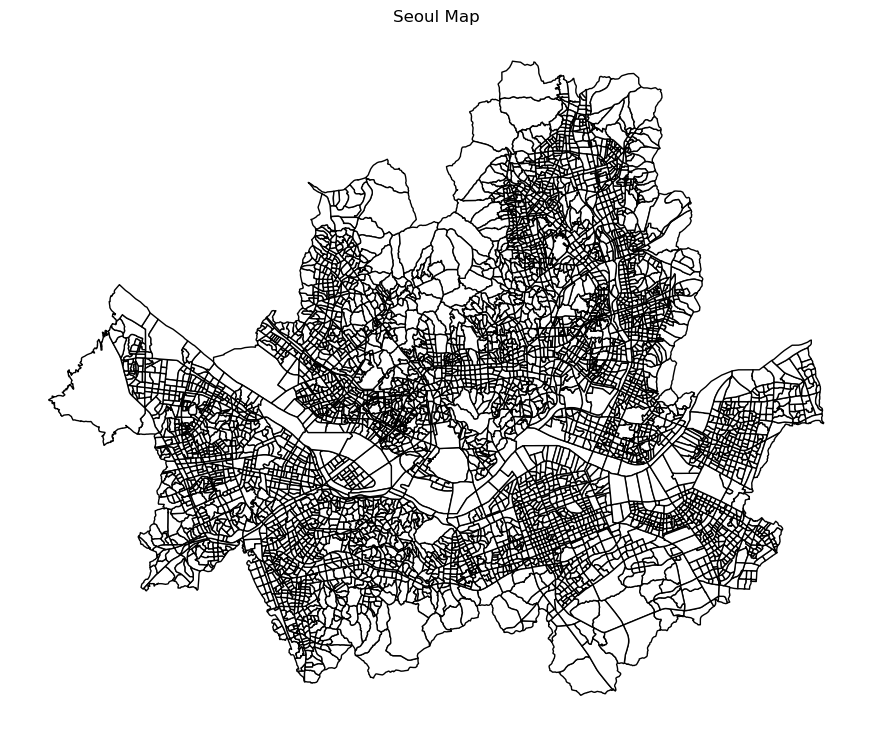

In [8]:
ax = seoul.plot(figsize=(11, 11), color="w", edgecolor="k")
ax.set_title("Seoul Map")
ax.set_axis_off()
plt.show()

In [12]:
from IPython.display import Image

### 지리정보 변환 (Geometry 데이터)
> convex_hull

- Polygon 데이터의 convex hull을 그린다.

![convex](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Ft1.daumcdn.net%2Fcfile%2Ftistory%2F995CE63F5B27FB1713)

> envelope

- Polygon 데이터를 감싸는 가장 작은 사각형을 그린다.

![envelope](https://esri.github.io/geometry-api-java/doc/Images/Envelope/Envelope4.jpg)

> simplify(tolerance, preserve_topology=True)

- Polygon 데이터에 대해 컨투어 추정을 한다. (점의 수를 줄여 실제 라인과 근사한 라인을 그림)

> buffer(distance, resolution=16)

- Point, LineString 데이터에 실행하면 주어진 거리 내의 모든 점을 이어 Polygon 데이터를 만들고, Polygon에 적용하면 주어진 거리만큼 확장한다.

> unary_union

- 여러 개의 geometry 데이터의 합집합을 구한다.

- Polygon 내에 빈 곳이 있는 경우, unary_union가 실행 되지 않는다. 이 때는 buffer() 명령으로 Polygon의 빈 곳을 채워준 후 사용한다.

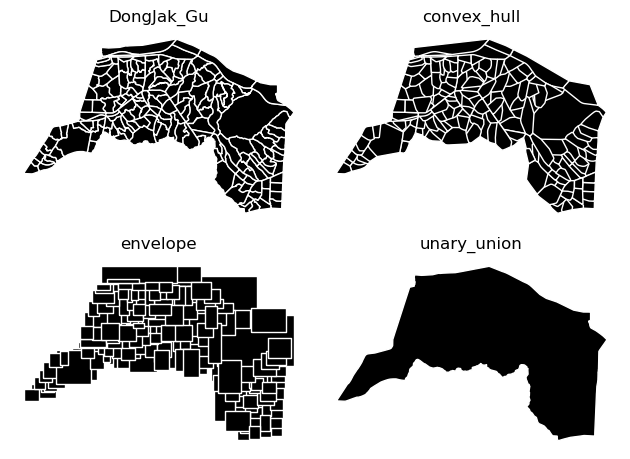

In [14]:
sample = seoul[seoul.SIG_KOR_NM == "동작구"] #동작구 데이터만 추출

ax = plt.subplot(2, 2, 1) #시각화에서 2*2중 왼쪽 상단에 표시
sample.plot(color='k', edgecolor="w", ax=ax)
ax.set_title("DongJak_Gu")
ax.set_axis_off()

ax = plt.subplot(2, 2, 2) #Convex_hull
sample.convex_hull.plot(color='k', edgecolor="w", ax=ax)
ax.set_title("convex_hull")
ax.set_axis_off()

ax = plt.subplot(2, 2, 3) #Envelope
sample.envelope.plot(color='k', edgecolor="w", ax=ax)
ax.set_title("envelope")
ax.set_axis_off()

ax = plt.subplot(2, 2, 4) #Buffer처리를 해주고 Unary_union을 해준 모습
gpd.GeoSeries([sample.geometry.buffer(0.1).unary_union]
              ).plot(ax=ax, color="k", edgecolor='w')
ax.set_title("unary_union")
ax.set_axis_off()

plt.tight_layout()
plt.show()

### GeoDataFrame 또한 Pandas DataFrame의 groupby 명령과 같은 그룹핑 기능을 제공함

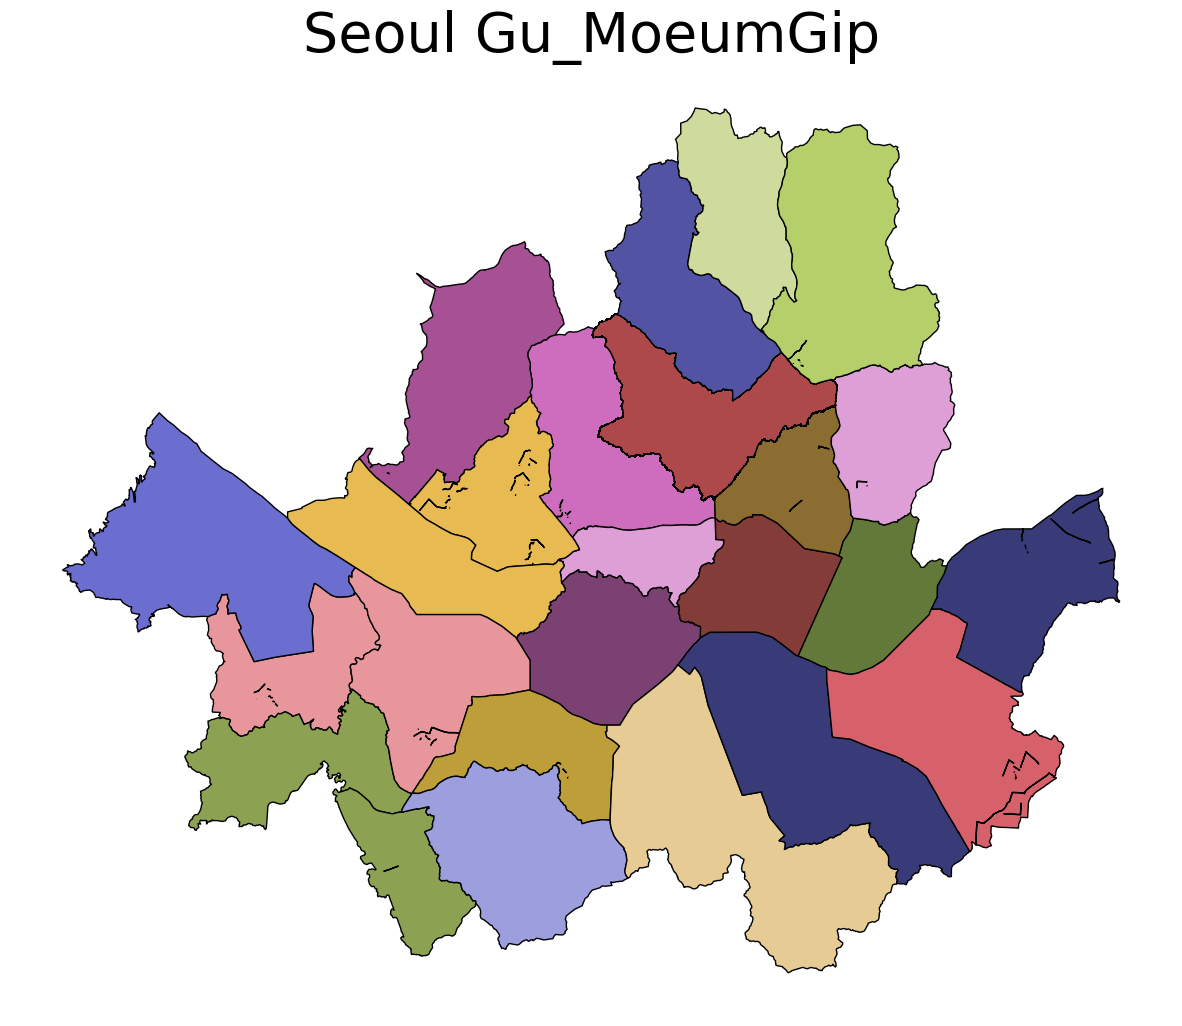

In [21]:
seoul.geometry = seoul.buffer(0.001)
seoul = seoul.dissolve(by='SIG_CD')
ax = seoul.plot(figsize=(15, 15), column="SIG_KOR_NM", categorical=True,
                cmap="tab20b", edgecolor="k", legend=False) #legend는 범례, 한글로 하면 깨져서 False로 범례없앰
ax.set_title("Seoul Gu_MoeumGip", fontsize=40)
ax.set_axis_off()
plt.show()

# 5. GeoPandas의 좌표계

좌표계(CRS) 는 지구라는 곡면을 2차원 데이터(평면)로 표현하는 방법론을 의미한다.<br> GeoPandas 데이터라면 "crs" 속성값으로 확인 할 수 있다.<br> 좌표계가 다른 데이터의 경우, 좌표간의 거리나 위치 등이 다르게 표현되기 때문에 반드시 통일 시켜주어야 한다.<br> 잘 사용되는 좌표계는 다음과 같다.

- WGS84(EPSG:4326): GPS가 사용하는 좌표계(경도와 위도)

- Bessel 1841(EPSG:4004): 한국과 일본에 잘 맞는 지역타원체를 사용한 좌표계

- GRS80 UTM-K(EPSG:5179): 한반도 전체를 하나의 좌표계로 나타낼 때 많이 사용하는 좌표계. 네이버 지도

- GRS80 중부원점(EPSG:5181): 과거 지리원 좌표계에서 타원체 문제를 수정한 좌표계. 다음카카오 지도

- Web mercator projection(Pseudo-Mercator, EPSG:3857) : 구글지도/빙지도/야후지도/OSM 등 에서 사용중인 좌표계

- Albers projection(EPSG:9822) : 미국 지질 조사국에서 사용하는 좌표계

In [24]:
countries.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

GeoPandas는 좌표계 변환 기능을 to_crs()라는 함수로 제공한다. <br>다음 코드는 “epsg:4326” 에서 “epsg:3857”로 변환한다. 다음 코드의 시각화된 결과를 보면, 남극이 찢어져 있는 것을 볼 수 있다.<br> “epsg:3857”, Web mercator projection은 내부적으로 계산이 간단하고 빠르다는 장점이 있지만,<br> 북위 85도, 남위 85도 이상의 지역, 즉 극지방에 대해서는 정보 왜곡이 심하다. 남극 부분이 왜곡된 것은 이 때문이다.

In [25]:
countries_mercator = countries.to_crs(epsg=3857)

print(countries_mercator.geometry[113])

POLYGON ((2614241.130436479 7153601.785967645, 2619073.309504622 7070435.576908914, 2649953.2347877226 6999613.069934945, 2649314.6968394318 6926062.815965136, 2582555.8419753523 6888660.742470466, 2616898.8289239593 6804402.184097363, 2619021.536157463 6724260.516108001, 2675005.7822184064 6569348.0703989, 2663069.1494012605 6520185.512981648, 2607826.9879829274 6499876.023004115, 2506742.403952631 6356150.531597702, 2535459.3538433225 6279511.087609827, 2511160.3962435066 6289421.884152674, 2405370.1902158973 6355008.512342295, 2325236.554002487 6330832.415777706, 2272680.8540422777 6348389.6323475735, 2206911.4453683435 6311783.64968567, 2150771.879265926 6372407.960023718, 2105004.2403776343 6349141.515028634, 2098722.4075890477 6359484.523483149, 2047489.804278448 6444306.756093704, 1964727.2325482017 6454772.762874232, 1954165.4697278284 6509230.959613079, 1877822.7930452595 6528767.982364263, 1861203.5486073168 6483723.521564442, 1800732.2791259561 6519788.224792923, 1807675.660

# 6. Geocoding

Geopandas가 제공하는 유용한 기능<br>
주소를 좌표로 바꾸거나, 좌표를 주소로 바꾸는 기능

In [5]:
seoul_file = "C:/Users/SKW/Desktop/LSMD_ADM_SECT_UMD_서울/LSMD_ADM_SECT_UMD_11_202309.shp"
seoul_data = gpd.read_file(seoul_file, encoding='euckr')
seoul_data.tail()

,EMD_CD,COL_ADM_SE,EMD_NM,SGG_OID,geometry
462,11200102,11200,하왕십리동,3987,"POLYGON ((201978.045 551055.647, 202010.904 55..."
463,11680110,11680,압구정동,1049,"POLYGON ((201206.655 547678.558, 201168.115 54..."
464,11680107,11680,신사동,1050,"MULTIPOLYGON (((201575.495 546925.084, 201764...."
465,11680118,11680,도곡동,1056,"POLYGON ((202795.653 543345.282, 202818.978 54..."
466,11680103,11680,개포동,1111,"POLYGON ((206967.216 544220.653, 206986.367 54..."


In [9]:
import pandas as pd
market_file = "C:/Users/SKW/Desktop/traditional_market.xlsx"
market = pd.read_excel(market_file)
market.tail(3)

,Unnamed: 0,연번,자치구,시장명,형태,신주소\n(구주소),유형,전화번호,건물형\n(연면적),점포수\n(빈점포제외)
392,NaN,367,강동구,로데오거리상점가,상점가,강동구 천호대로157길 14\n(천호동 454-50),상점가,478-7156,6273,150.0
393,NaN,368,강동구,장신구 특화거리 상점가,상점가,강동구 성내로 83\n(성내동 545-6),상점가,475-9140,3366,109.0
394,NaN,369,강동구,고덕 골목형상점가,상점가,강동구 고덕로83길 18일대,골목형상점가,429-1376,6699,104.0


In [45]:
market['신주소\n(구주소)'] = market['신주소\n(구주소)'].apply(lambda x: x.split('\n')[0] if pd.notna(x) else x)
address = "서울특별시 " + market["신주소\n(구주소)"].sample(50)
address = list(address)
address

['서울특별시 강남구 압구정로29길 72-1',
 '서울특별시 은평구통일로850',
 '서울특별시 은평구 증산로15길11',
 '서울특별시 관악구 원신1길 28-1',
 '서울특별시 광진구 영화사로 12            ',
 '서울특별시 관악구 은천로 28',
 '서울특별시  중구 퇴계로20길 18일대',
 '서울특별시 광진구 뚝섬로30길 23              ',
 '서울특별시 영등포구 영등포로 219         ',
 '서울특별시 은평구 응암로12길8 ',
 '서울특별시 강서구 화곡로 68길 120 ',
 '서울특별시 마포구 어울마당로109~155일대',
 '서울특별시 영등포구 문래로30길 27',
 '서울특별시 양천구 신정동 126-5 일대',
 '서울특별시 종로구 삼일대로 428',
 '서울특별시 중구 남대문시장 8길 7                                      (남창동 5)',
 '서울특별시 동대문구 왕산로33길 6 (제기동 635-35)',
 '서울특별시 강남구 봉은사로33길 33',
 '서울특별시 다산로 42나길 46일대',
 '서울특별시 종로구 종로 266',
 '서울특별시 서울시 중랑구 사가정로 50길84                (중랑구 면목7동 666-15)',
 '서울특별시 강서구 강서로12길 14',
 '서울특별시 관악구 신원로 23',
 '서울특별시 중구 동호로 390-3                          ',
 '서울특별시 강서구 까치산로 35 ',
 '서울특별시 노원구 동일로 180길 53             ',
 '서울특별시 관악구 남부순환로248길 35',
 '서울특별시 관악구 신원로3길 20-3',
 '서울특별시 서대문구 연세로5다길 40, 2층',
 '서울특별시 동작대로3길 14 일원',
 '서울특별시 서울시 중랑구 동일로129길35',
 '서울특별시 관악구 원신2길 34',
 '서울특별시 성북구 정릉로 26가길36일대',
 '서울특별시 성동구 성수이로 32-15',


In [42]:
from urllib.parse import quote
def geocode_address(address):
    encoded_address = quote(address)
    url = f"https://nominatim.openstreetmap.org/search?format=json&q={encoded_address}"
    headers = {'Shim': 'Geocoding'}

    response = requests.get(url, headers=headers)
    data = response.json()

    if data:
        latitude = data[0]['lat']
        longitude = data[0]['lon']
        return latitude, longitude
    else:
        return None, None

In [31]:
import requests
import json

In [46]:
for i in address:
    lat, lon = geocode_address(i)
    if lat and lon:
        print(f"주소: {i}, 위도: {lat}, 경도: {lon}")
    else:
        print(f"주소: {i}, Geocoding 실패")

주소: 서울특별시 강남구 압구정로29길 72-1, 위도: 37.5322776, 경도: 127.0283897
주소: 서울특별시 은평구통일로850, Geocoding 실패
주소: 서울특별시 은평구 증산로15길11, Geocoding 실패
주소: 서울특별시 관악구 원신1길 28-1, 위도: 37.4701935, 경도: 126.9327108
주소: 서울특별시 광진구 영화사로 12            , 위도: 37.5525116, 경도: 127.0995989
주소: 서울특별시 관악구 은천로 28, 위도: 37.4861285, 경도: 126.9495507
주소: 서울특별시  중구 퇴계로20길 18일대, Geocoding 실패
주소: 서울특별시 광진구 뚝섬로30길 23              , 위도: 37.5346978, 경도: 127.067068
주소: 서울특별시 영등포구 영등포로 219         , 위도: 37.5214105, 경도: 126.8956468
주소: 서울특별시 은평구 응암로12길8 , Geocoding 실패
주소: 서울특별시 강서구 화곡로 68길 120 , Geocoding 실패
주소: 서울특별시 마포구 어울마당로109~155일대, Geocoding 실패
주소: 서울특별시 영등포구 문래로30길 27, Geocoding 실패
주소: 서울특별시 양천구 신정동 126-5 일대, Geocoding 실패
주소: 서울특별시 종로구 삼일대로 428, 위도: 37.5751383, 경도: 126.9869025
주소: 서울특별시 중구 남대문시장 8길 7                                      (남창동 5), Geocoding 실패
주소: 서울특별시 동대문구 왕산로33길 6 (제기동 635-35), Geocoding 실패
주소: 서울특별시 강남구 봉은사로33길 33, 위도: 37.5094329, 경도: 127.0353148
주소: 서울특별시 다산로 42나길 46일대, Geocoding 실패
주소: 서울특별시 종로구 종로 266, 위도: 37